## Importing Packages & Datasets

### Importing Packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import VarianceThreshold,RFE, mutual_info_classif, RFECV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, make_scorer, precision_recall_curve
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier


### Importing Dataset

In [68]:
# CHANGE PATH
fold_1 = pd.read_csv('C:/Users/matth/Documents/Y3S1/CS3244/proj_data/smote_train_data/fold_1.csv')
fold_2 = pd.read_csv('C:/Users/matth/Documents/Y3S1/CS3244/proj_data/smote_train_data/fold_2.csv')
fold_3 = pd.read_csv('C:/Users/matth/Documents/Y3S1/CS3244/proj_data/smote_train_data/fold_3.csv')
fold_4 = pd.read_csv('C:/Users/matth/Documents/Y3S1/CS3244/proj_data/smote_train_data/fold_4.csv')
fold_5 = pd.read_csv('C:/Users/matth/Documents/Y3S1/CS3244/proj_data/smote_train_data/fold_5.csv')
smote_fold_1 = pd.read_csv('C:/Users/matth/Documents/Y3S1/CS3244/proj_data/smote_train_data/smote_fold_1.csv')
smote_fold_2 = pd.read_csv('C:/Users/matth/Documents/Y3S1/CS3244/proj_data/smote_train_data/smote_fold_2.csv')
smote_fold_3 = pd.read_csv('C:/Users/matth/Documents/Y3S1/CS3244/proj_data/smote_train_data/smote_fold_3.csv')
smote_fold_4 = pd.read_csv('C:/Users/matth/Documents/Y3S1/CS3244/proj_data/smote_train_data/smote_fold_4.csv')
smote_fold_5 = pd.read_csv('C:/Users/matth/Documents/Y3S1/CS3244/proj_data/smote_train_data/smote_fold_5.csv')
test_set = pd.read_csv('C:/Users/matth/Documents/Y3S1/CS3244/proj_data/transformed_data/test_set.csv')

## Logistic Regression Model

We will proceed with this flow:

1. Logistic Regression Model Development
Train a logistic regression model on the preprocessed dataset, adjusting hyperparameters and exploring regularization techniques (e.g., L1 or L2) to prevent overfitting.

2. Model Evaluation
Evaluate the model's performance using utility fraud-specific metrics such as precision, recall, F1-score, AUC-ROC, and confusion matrix analysis.
Assess the balance between false positives and false negatives to minimize both missed fraud and unnecessary alerts.

### Preparing Data

In [69]:
training_data = pd.concat([smote_fold_1, smote_fold_2, smote_fold_3, smote_fold_4])
X_train = training_data.drop(columns='fraud_status')
y_train = training_data['fraud_status']
X_val = fold_5.drop(columns='fraud_status')
y_val = fold_5['fraud_status']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_val)
print(classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.02      0.03     20478
         1.0       0.06      1.00      0.11      1200

    accuracy                           0.07     21678
   macro avg       0.52      0.51      0.07     21678
weighted avg       0.94      0.07      0.03     21678

Confusion Matrix:
 [[  313 20165]
 [    2  1198]]
Accuracy: 0.06970200202970754


Accuracy is very poor from this training data. Some columns might not have been useful for predicting fraud status hence we have chosen to remove `month_number`,  `region  _101` to `region_399`, `district_62` to `district_69` and `client_catg_11` to `client_catg_51` as after excluding, the model's performance improved significantly. Columns like `creation` date were also removed as they are not directly relevant to predicting fraud and could introduce noise to the model.

In [71]:
training_data = pd.concat([smote_fold_1, smote_fold_2, smote_fold_3, smote_fold_4])
columns_drop = ['fraud_status', 'creation_year', 'creation_month', 'creation_day', 'months_number_min', 
                'months_number_max', 'months_number_median', 'region_101','region_103', 
                'region_104', 'region_105', 'region_106', 'region_107',
                   'region_199', 'region_206', 'region_301', 'region_302', 'region_303',
                   'region_304', 'region_305', 'region_306', 'region_307', 'region_308',
                   'region_309', 'region_310', 'region_311', 'region_312', 'region_313',
                   'region_371', 'region_372', 'region_379', 'region_399',
                   'district_62', 'district_63', 'district_69', 'client_catg_11', 'client_catg_12',
                   'client_catg_51']
X_train = training_data.drop(columns=columns_drop)
y_train = training_data['fraud_status']
X_val = fold_5.drop(columns=columns_drop)
y_val = fold_5['fraud_status']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)

### Training Model

In [27]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [28]:
y_pred = log_reg.predict(X_val)

In [29]:
print(classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.56      0.71     20478
         1.0       0.10      0.88      0.19      1200

    accuracy                           0.58     21678
   macro avg       0.55      0.72      0.45     21678
weighted avg       0.94      0.58      0.68     21678

Confusion Matrix:
 [[11438  9040]
 [  143  1057]]
Accuracy: 0.5763908109604207


## RFE

In [17]:
scores = []

max_features = X_train.shape[1]
for n in range(1, max_features + 1): 
    rfe = RFE(estimator= LogisticRegression(max_iter=5000), n_features_to_select=n)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    score = np.mean(cross_val_score(LogisticRegression(max_iter=5000), X_train_rfe, y_train, cv=5))
    scores.append(score)

best_n_features = np.argmax(scores) + 1
print(f"Best number of features to select: {best_n_features}")

Best number of features to select: 40


In [ ]:
rfe = RFE(estimator=LogisticRegression(max_iter=5000), n_features_to_select=40)
X_train_rfe = rfe.fit_transform(X_train, y_train)

X_val_rfe = X_val.iloc[:, rfe.support_] if hasattr(X_val, 'iloc') else X_val[:, rfe.support_]

log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train_rfe, y_train)

y_pred = log_reg.predict(X_val_rfe)

In [31]:
print(classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.56      0.71     20478
         1.0       0.10      0.88      0.19      1200

    accuracy                           0.58     21678
   macro avg       0.55      0.72      0.45     21678
weighted avg       0.94      0.58      0.68     21678

Confusion Matrix:
 [[11409  9069]
 [  141  1059]]
Accuracy: 0.5751453086078051


Some of the features eliminated by RFE may have been important for prediction hence a slight decrease in accuracy.

## PCA

In [49]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

### Plotting Cumulative Variance

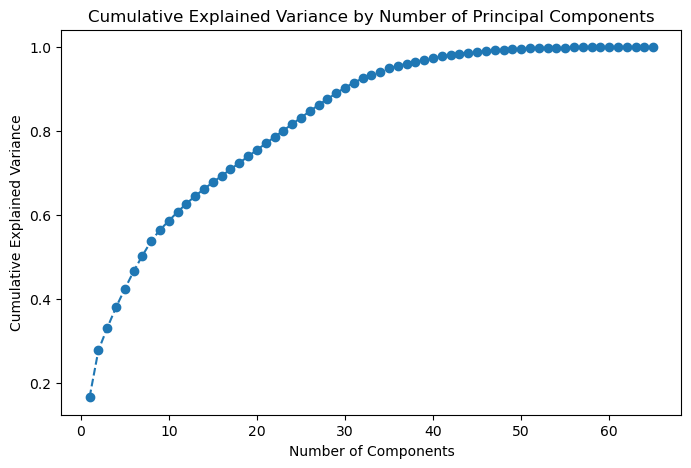

Number of components explaining 95% variance: 36


In [50]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()
n_components = np.argmax(pca.explained_variance_ratio_.cumsum() >= 0.95) + 1
print(f"Number of components explaining 95% variance: {n_components}")

In [51]:
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.fit_transform(X_val)

In [52]:
log_reg = LogisticRegression()
log_reg.fit(X_train_pca, y_train)

LogisticRegression()

In [53]:
y_pred = log_reg.predict(X_val_pca)

In [54]:
print(classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.56      0.71     20478
         1.0       0.09      0.73      0.16      1200

    accuracy                           0.57     21678
   macro avg       0.53      0.64      0.43     21678
weighted avg       0.92      0.57      0.68     21678

Confusion Matrix:
 [[11396  9082]
 [  326   874]]
Accuracy: 0.5660116246886244


 PCA reduces the dimensionality of the data by combining features into principal components, prioritizing variance but potentially discarding subtle patterns in the original features hence leading to a decrease in accuracy.

## GridSearchCV

### Finding best parameters

In [55]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 500, 1000] 
}

log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', verbose=0)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

c:\Users\matth\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\matth\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best Parameters: {'C': 100, 'max_iter': 100, 'penalty': 'l2'}
Best Score: 0.7669167469140487


### Using Best Parameters

In [56]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)

In [57]:
print(classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.56      0.71     20478
         1.0       0.10      0.88      0.19      1200

    accuracy                           0.58     21678
   macro avg       0.55      0.72      0.45     21678
weighted avg       0.94      0.58      0.68     21678

Confusion Matrix:
 [[11442  9036]
 [  143  1057]]
Accuracy: 0.5765753298274748


## Adjusting Threshold

Best threshold for F1-score: 0.7531360818876185


C:\Users\matth\AppData\Local\Temp\ipykernel_37740\2599330358.py:3: RuntimeWarning: invalid value encountered in divide
  f1_scores = np.where((precision + recall) == 0, 0, 2 * (precision * recall) / (precision + recall))


Text(0.5, 1.0, 'Precision-Recall Curve')

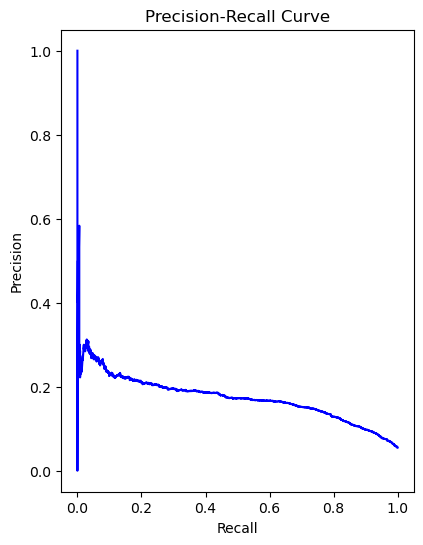

In [58]:
y_prob = best_model.predict_proba(X_val)[:, 1]
precision, recall, threshold = precision_recall_curve(y_val, y_prob)
f1_scores = np.where((precision + recall) == 0, 0, 2 * (precision * recall) / (precision + recall))
best_threshold = threshold[np.argmax(f1_scores)]
print(f"Best threshold for F1-score: {best_threshold}")

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

In [59]:
y_pred_best_threshold = (y_prob >= best_threshold).astype(int)
print(classification_report(y_val, y_pred_best_threshold))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_best_threshold))
print("Accuracy:", accuracy_score(y_val, y_pred_best_threshold))

              precision    recall  f1-score   support

         0.0       0.97      0.81      0.89     20478
         1.0       0.17      0.63      0.26      1200

    accuracy                           0.80     21678
   macro avg       0.57      0.72      0.57     21678
weighted avg       0.93      0.80      0.85     21678

Confusion Matrix:
 [[16658  3820]
 [  442   758]]
Accuracy: 0.8033951471537965


## K-Folds Cross Validation

In [60]:
folds = [fold_1, fold_2, fold_3, fold_4, fold_5]
smotes = [smote_fold_1, smote_fold_2, smote_fold_3, smote_fold_4, smote_fold_5]

for i in range(len(folds)):
    test_fold = folds[i]
    train_folds = [fold for j, fold in enumerate(smotes) if j != i]
    X_train = pd.concat([fold.drop(columns=columns_drop) for fold in train_folds], axis=0)
    y_train = pd.concat([fold['fraud_status'] for fold in train_folds], axis=0)
    X_val = test_fold.drop(columns=columns_drop)
    y_val = test_fold['fraud_status']

    X_train_scaled = scaler.transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    best_model.fit(X_train_scaled, y_train)
    y_pred = best_model.predict(X_val_scaled)
    y_pred_best_threshold = (y_pred >= best_threshold).astype(int)
    print(f"Classification Report for fold {i + 1}:\n", classification_report(y_val, y_pred_best_threshold))
    print(f"Confusion Matrix for fold {i + 1}:\n", confusion_matrix(y_val, y_pred_best_threshold))
    print(f"Accuracy for fold {i + 1}: {accuracy_score(y_val, y_pred_best_threshold):.4f}")
    print("-" * 50)


Classification Report for fold 1:
               precision    recall  f1-score   support

         0.0       0.98      0.77      0.86     20479
         1.0       0.15      0.70      0.25      1200

    accuracy                           0.77     21679
   macro avg       0.57      0.74      0.56     21679
weighted avg       0.93      0.77      0.83     21679

Confusion Matrix for fold 1:
 [[15859  4620]
 [  362   838]]
Accuracy for fold 1: 0.7702
--------------------------------------------------
Classification Report for fold 2:
               precision    recall  f1-score   support

         0.0       0.98      0.77      0.86     20479
         1.0       0.15      0.72      0.25      1200

    accuracy                           0.77     21679
   macro avg       0.57      0.74      0.56     21679
weighted avg       0.93      0.77      0.83     21679

Confusion Matrix for fold 2:
 [[15771  4708]
 [  341   859]]
Accuracy for fold 2: 0.7671
-----------------------------------------------

c:\Users\matth\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for fold 3:
               precision    recall  f1-score   support

         0.0       0.98      0.77      0.86     20478
         1.0       0.16      0.74      0.26      1201

    accuracy                           0.76     21679
   macro avg       0.57      0.75      0.56     21679
weighted avg       0.93      0.76      0.83     21679

Confusion Matrix for fold 3:
 [[15669  4809]
 [  310   891]]
Accuracy for fold 3: 0.7639
--------------------------------------------------
Classification Report for fold 4:
               precision    recall  f1-score   support

         0.0       0.98      0.76      0.86     20478
         1.0       0.16      0.75      0.26      1201

    accuracy                           0.76     21679
   macro avg       0.57      0.75      0.56     21679
weighted avg       0.94      0.76      0.82     21679

Confusion Matrix for fold 4:
 [[15610  4868]
 [  306   895]]
Accuracy for fold 4: 0.7613
-----------------------------------------------

c:\Users\matth\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Preparing Test Data

In [72]:
columns_drop = ['fraud_status', 'creation_year', 'creation_month', 'creation_day', 'months_number_min', 
                'months_number_max', 'months_number_median', 'region_101','region_103', 
                'region_104', 'region_105', 'region_106', 'region_107',
                   'region_199', 'region_206', 'region_301', 'region_302', 'region_303',
                   'region_304', 'region_305', 'region_306', 'region_307', 'region_308',
                   'region_309', 'region_310', 'region_311', 'region_312', 'region_313',
                   'region_371', 'region_372', 'region_379', 'region_399',
                   'district_62', 'district_63', 'district_69', 'client_catg_11', 'client_catg_12',
                   'client_catg_51', 'client_id', 'creation_date']
X_test = test_set.drop(columns=columns_drop)
y_test = test_set['fraud_status']
X_test_scaled = scaler.transform(X_test)

In [73]:
y_pred = best_model.predict(X_test_scaled)
y_pred_best_threshold = (y_pred >= best_threshold).astype(int)
print(classification_report(y_test, y_pred_best_threshold))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_threshold))
print("Accuracy:", accuracy_score(y_test, y_pred_best_threshold))

              precision    recall  f1-score   support

         0.0       0.98      0.77      0.86     25535
         1.0       0.16      0.73      0.26      1564

    accuracy                           0.76     27099
   macro avg       0.57      0.75      0.56     27099
weighted avg       0.93      0.76      0.82     27099

Confusion Matrix:
 [[19561  5974]
 [  425  1139]]
Accuracy: 0.7638658253072069
